In [144]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [145]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

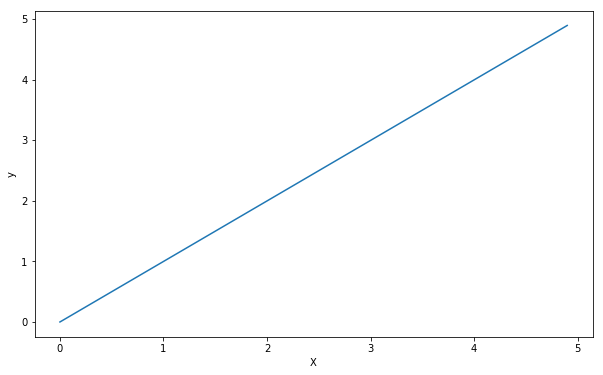

In [146]:
a = 1
b = 0

y = a*X + b
plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

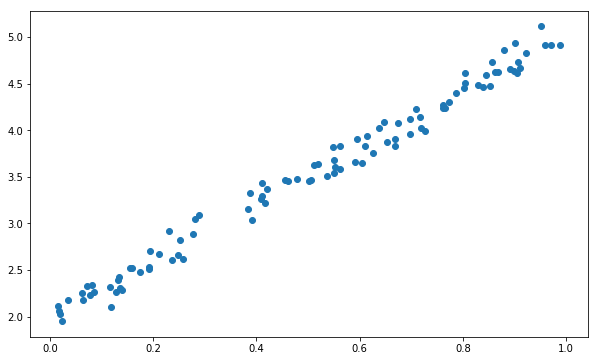

In [147]:
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

plt.scatter(x_data,y_data)
#plt.plot(x_data, y_data, 'bo')
plt.show()

In [148]:
list(zip(x_data, y_data))[0:5]

[(0.19134459, 2.5337835653475627),
 (0.46172622, 3.457462779597948),
 (0.40817064, 3.2644931074408756),
 (0.55023384, 3.547271298023006),
 (0.9506791, 5.119221079012286)]

In [149]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [150]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

trained_parametes = []
for step in range(100):
    evals = sess.run([train, a, b])[1:]
    if step % 5 == 0:
        print(step, evals)
        trained_parametes.append(evals)
final_result = evals
print('Final result: a= {}, b= {}'.format(final_result[0], final_result[1]))

0 [2.5999908, 3.0235522]
5 [2.4924216, 2.288732]
10 [2.6509502, 2.204112]
15 [2.7621953, 2.1438818]
20 [2.8405108, 2.1014814]
25 [2.8956437, 2.0716321]
30 [2.9344566, 2.050619]
35 [2.9617803, 2.0358257]
40 [2.9810157, 2.0254116]
45 [2.9945571, 2.0180802]
50 [3.00409, 2.012919]
55 [3.0108013, 2.0092857]
60 [3.0155258, 2.0067277]
65 [3.0188518, 2.0049272]
70 [3.0211933, 2.0036592]
75 [3.0228417, 2.0027668]
80 [3.0240023, 2.0021386]
85 [3.0248194, 2.001696]
90 [3.0253944, 2.0013847]
95 [3.0257993, 2.0011656]
Final result: a= 3.0260350704193115, b= 2.001038074493408


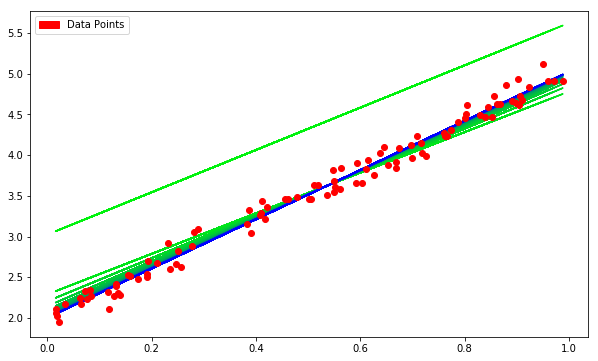

In [153]:
# convert lines from green to blue with each optimized parameter set
converter = matplotlib.colors
cr, cg, cb = (0.0, 1.0, 0.0)
for params in trained_parametes:
    cb += 1.0 / len(trained_parametes)
    cg -= 1.0 / len(trained_parametes)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = params
    f_y = np.vectorize(lambda x: a*x+b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))
plt.plot(x_data, y_data, 'ro')

legend = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[legend])
plt.show()

In [152]:
sess.close()